## Equipo #4 | TC3006C.102

- Karla Andrea Palma Villanueva (A01754270)
- Viviana Alanis Fraige (A01236316)
- David Fernando Armendariz Torres (A01570813)
- Alan Alberto Mota Yescas (A01753924)
- Adrián Chávez Morales (A01568679)
- Jose Manuel Armendáriz Mena (A01197583)

In [72]:
# Import libraries
import pandas as pd # Dataframe management
import re # Regular expressions
import numpy as np # Math 
import matplotlib.pyplot as plt # Plots

In [73]:
# Load & inspect trainig dataset
df = pd.read_csv("train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [74]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
# Extract titles for each passanger and store them in new column
titles = []
for name in df["Name"]:
    titles.append("".join(re.findall(r',([^.]*)\.', name))[1:])
df["Titles"] = titles
df["Titles"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Titles, dtype: int64

In [76]:
# Which titles belong to individual with missing age data.
df[np.isnan(df["Age"])]["Titles"].value_counts()

Mr        119
Miss       36
Mrs        17
Master      4
Dr          1
Name: Titles, dtype: int64

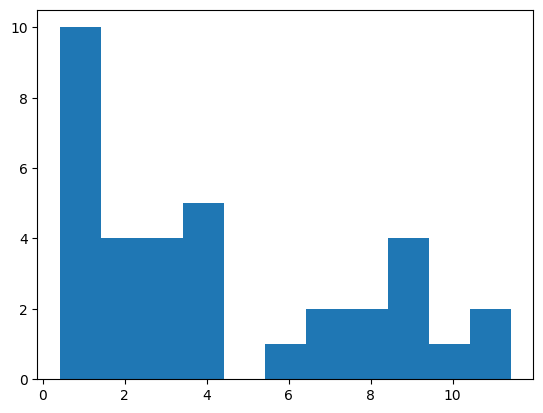

In [77]:
# Check Age distribution for "Master" Title
master_ages = df[df["Titles"] == "Master"]["Age"].dropna()
plt.hist(master_ages, bins=np.arange(master_ages.min(), master_ages.max())) # Check for outliers
master_ages_mean = master_ages.mean()

In [78]:
# Identify outliers using Z-score
master_z = (master_ages - master_ages.mean()) / master_ages.std()
outliers = master_z > 3
print(outliers.value_counts())

False    36
Name: Age, dtype: int64


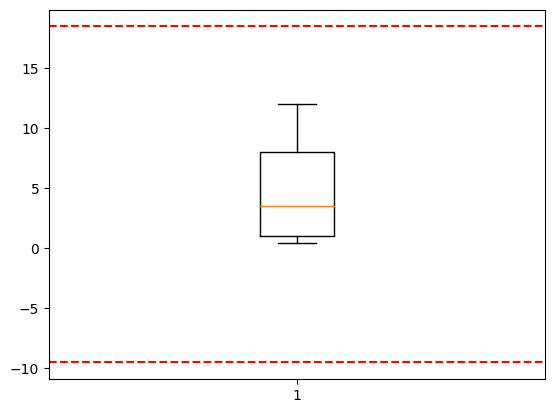

In [79]:
# Check for Master Age outliers using IQR
Q1 = master_ages.quantile(0.25)
Q3 = master_ages.quantile(0.75)
IQR = Q3 - Q1

plt.boxplot(master_ages)
plt.axhline(y=Q1 - 1.5 * IQR, color='r', linestyle='--')
plt.axhline(y=Q3 + 1.5 * IQR, color='r', linestyle='--')
plt.show()

In [80]:
# Fill null ages of "Master" Title with its average
df[df["Titles"] == "Master"] = df[df["Titles"] == "Master"].fillna(value = master_ages_mean)

(array([ 1.,  0.,  0.,  2.,  1., 11.,  7., 13., 18., 14., 17., 15., 10.,
        15., 18., 13., 11., 19., 13., 15., 10., 15.,  9., 12., 10., 16.,
         5.,  5.,  8.,  8.,  2.,  9.,  3.,  5.,  7.,  3.,  7.,  5.,  3.,
         4.,  5.,  3.,  0.,  3.,  2.,  2.,  0.,  2.,  2.,  2.,  3.,  3.,
         0.,  2.,  3.,  1.,  0.,  0.,  0.,  2.,  2.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.]),
 array([11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.,
        24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36.,
        37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49.,
        50., 51., 52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62.,
        63., 64., 65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75.,
        76., 77., 78., 79.]),
 <BarContainer object of 68 artists>)

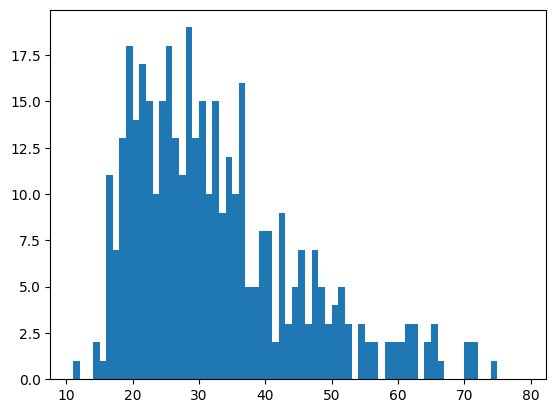

In [81]:
# Check Age distribution for "Mr" Title
mr_ages = df[df["Titles"] == "Mr"]["Age"].dropna()
plt.hist(mr_ages, bins=np.arange(mr_ages.min(), mr_ages.max())) # Check for outliers

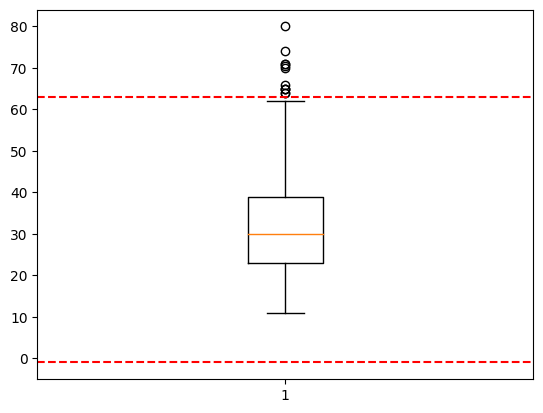

In [82]:
# Check for Mr Age outliers using IQR
Q1 = mr_ages.quantile(0.25)
Q3 = mr_ages.quantile(0.75)
IQR = Q3 - Q1

plt.boxplot(mr_ages)
plt.axhline(y=Q1 - 1.5 * IQR, color='r', linestyle='--')
plt.axhline(y=Q3 + 1.5 * IQR, color='r', linestyle='--')
plt.show()

In [83]:
# Fill null ages of "Mr" Title with its median
mr_ages_median = mr_ages.median()
df[df["Titles"] == "Mr"] = df[df["Titles"] == "Mr"].fillna(value = mr_ages_median)

(array([ 4.,  6.,  2.,  5.,  4.,  2.,  1.,  2.,  4.,  1.,  1.,  0.,  2.,
         4.,  3.,  6.,  4., 10.,  5.,  2.,  7.,  9.,  4.,  6.,  3.,  3.,
         3.,  2.,  1., 10.,  3.,  2.,  1.,  1.,  3.,  3.,  1.,  3.,  1.,
         2.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.]),
 array([ 0.75,  1.75,  2.75,  3.75,  4.75,  5.75,  6.75,  7.75,  8.75,
         9.75, 10.75, 11.75, 12.75, 13.75, 14.75, 15.75, 16.75, 17.75,
        18.75, 19.75, 20.75, 21.75, 22.75, 23.75, 24.75, 25.75, 26.75,
        27.75, 28.75, 29.75, 30.75, 31.75, 32.75, 33.75, 34.75, 35.75,
        36.75, 37.75, 38.75, 39.75, 40.75, 41.75, 42.75, 43.75, 44.75,
        45.75, 46.75, 47.75, 48.75, 49.75, 50.75, 51.75, 52.75, 53.75,
        54.75, 55.75, 56.75, 57.75, 58.75, 59.75, 60.75, 61.75, 62.75]),
 <BarContainer object of 62 artists>)

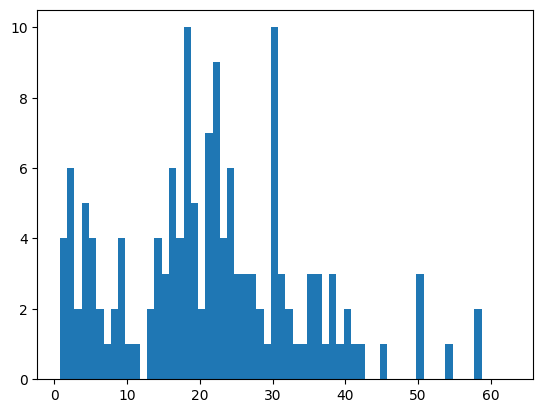

In [84]:
# Check Age distribution for "Miss" Title
miss_ages = df[df["Titles"] == "Miss"]["Age"].dropna()
plt.hist(miss_ages, bins=np.arange(miss_ages.min(), miss_ages.max())) # Check for outliers

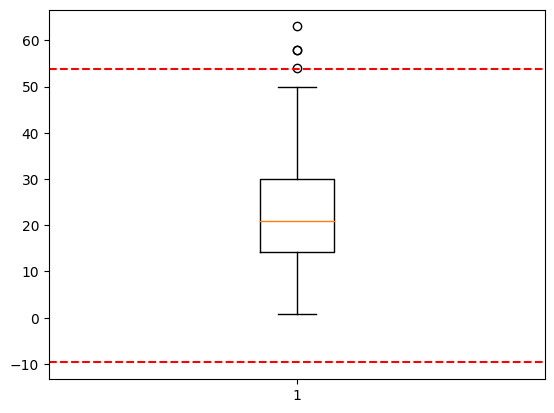

In [85]:
# Check for Miss Age outliers using IQR
Q1 = miss_ages.quantile(0.25)
Q3 = miss_ages.quantile(0.75)
IQR = Q3 - Q1

plt.boxplot(miss_ages)
plt.axhline(y=Q1 - 1.5 * IQR, color='r', linestyle='--')
plt.axhline(y=Q3 + 1.5 * IQR, color='r', linestyle='--')
plt.show()

In [86]:
# Fill null ages of "Miss" Title with its median
miss_ages_median = miss_ages.median()
df[df["Titles"] == "Miss"] = df[df["Titles"] == "Miss"].fillna(value = miss_ages_median)

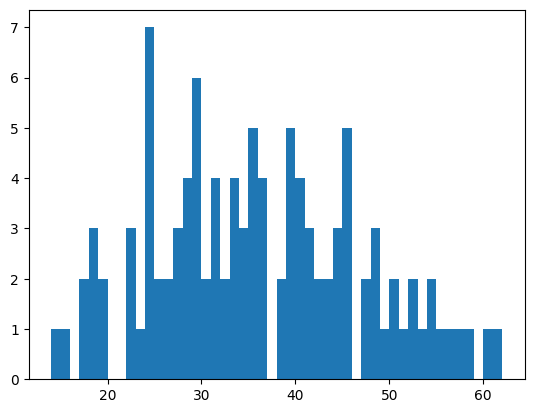

In [87]:
# Check Age distribution for "Mrs" Title
mrs_ages = df[df["Titles"] == "Mrs"]["Age"].dropna()
plt.hist(mrs_ages, bins=np.arange(mrs_ages.min(), mrs_ages.max())) # Check for outliers
mrs_ages_mean = mrs_ages.mean()

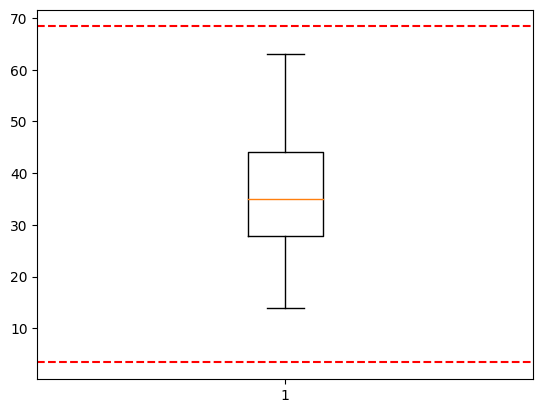

In [61]:
# Check for Mrs Age outliers using IQR
Q1 = mrs_ages.quantile(0.25)
Q3 = mrs_ages.quantile(0.75)
IQR = Q3 - Q1

plt.boxplot(mrs_ages)
plt.axhline(y=Q1 - 1.5 * IQR, color='r', linestyle='--')
plt.axhline(y=Q3 + 1.5 * IQR, color='r', linestyle='--')
plt.show()

In [88]:
mrs_ages_mean

35.898148148148145

In [89]:
df[np.isnan(df["Age"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Mrs
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,Mrs
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C,Mrs
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S,Mrs
186,187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q,Mrs
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.2000,NaN,C,Mrs
334,335,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,PC 17611,133.6500,NaN,S,Mrs
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.1000,NaN,S,Mrs
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,2626,7.2292,NaN,C,Mrs
375,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,NaN,1,0,PC 17604,82.1708,NaN,C,Mrs


In [62]:
# Fill null ages of "Mrs" Title with its average
df[df["Titles"] == "Mrs"] = df[df["Titles"] == "Mrs"].fillna(value = mrs_ages_mean)

In [63]:
# Look for other absent values in "Age"
df[np.isnan(df["Age"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6,NaN,C,Dr


In [64]:
# Dr. Arthur Jackson's age was researched and filled in manually
df.loc[df["PassengerId"] == 767, "Age"] = 46 # Rounded upwards
'''
Encyclopedia Titanica (2016) Arthur Jackson Brewe (ref: #41, last updated: 8th July 2016, accessed 19th August 2024 08:31:49 AM)
URL : https://www.encyclopedia-titanica.org/titanic-victim/arthur-jackson-brewe.html
'''

'\nEncyclopedia Titanica (2016) Arthur Jackson Brewe (ref: #41, last updated: 8th July 2016, accessed 19th August 2024 08:31:49 AM)\nURL : https://www.encyclopedia-titanica.org/titanic-victim/arthur-jackson-brewe.html\n'

In [65]:
# Check for other absent values in relevant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        877 non-null    object 
 11  Embarked     891 non-null    object 
 12  Titles       891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [66]:
# Duplicate relevant columns into a new dataframe
df_x = df[["PassengerId", "Pclass", "Sex", "Age", "Parch", "Titles", "Survived"]].copy()
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   Parch        891 non-null    int64  
 5   Titles       891 non-null    object 
 6   Survived     891 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [67]:
# Extract target column into a new dataframe
df_y = df_x[["PassengerId", "Survived"]].copy()
df_x.drop("Survived", axis = 1, inplace = True)

# Set indexes to Passanger Id
df_y.set_index("PassengerId", inplace=True)
df_x.set_index("PassengerId", inplace=True)

In [68]:
# Categorize "Sex"
df_x.loc[df_x["Sex"] == "male", "Sex"] = 0
df_x.loc[df_x["Sex"] == "female", "Sex"] = 1

In [69]:
# One hot encode "Titles", titles have been grouped based on relevance and equivalence
df_x['Mr'] = df_x['Titles'] == 'Mr' # Mr
df_x['Miss'] = (df_x['Titles'] == 'Miss') | (df_x['Titles'] == 'Mlle') | (df_x['Titles'] == 'Ms') # Miss and equivalents
df_x['Mrs'] = df_x['Titles'] == 'Mrs' # Mrs
df_x['Master'] = df_x['Titles'] == 'Master'# Master
df_x['Social Worker'] = (df_x['Titles'] == 'Dr') | (df_x['Titles'] == 'Rev') # Social Workers (Not really)
df_x['Millitary'] = (df_x['Titles'] == 'Major') | (df_x['Titles'] == 'Col') | (df_x['Titles'] == 'Capt') # Millitary
df_x['Nobility'] = (df_x['Titles'] == 'Sir') | (df_x['Titles'] == 'Lady') | (df_x['Titles'] == 'Mme') | (df_x['Titles'] == 'Don') | (df_x['Titles'] == 'Jonkheer') # Nobility
df_x.drop("Titles", axis = 1, inplace = True)

In [70]:
df_x.head()

,Pclass,Sex,Age,Parch,Mr,Miss,Mrs,Master,Social Worker,Millitary,Nobility
PassengerId,,,,,,,,,,,
1,3,0,22.0,0,True,False,False,False,False,False,False
2,1,1,38.0,0,False,False,True,False,False,False,False
3,3,1,26.0,0,False,True,False,False,False,False,False
4,1,1,35.0,0,False,False,True,False,False,False,False
5,3,0,35.0,0,True,False,False,False,False,False,False


In [71]:
df_y.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0
